# Random forest

In [10]:
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

## Load data that was downloaded in the 2.process-data


In [11]:
data_dir = os.path.join("..", "2.process-data", "data")
os.listdir(data_dir)

['test.tsv.gz',
 'test_processed.tsv.gz',
 'train.tsv.gz',
 'train_processed.tsv.gz']

In [12]:
train_file = os.path.join(data_dir, 'train_processed.tsv.gz')
train_data = pd.read_csv(train_file, sep='\t')
train_data.head()

,cell_code,cell_id,plate,replicate,well,field,target,actin.s.area,actin.s.radius.mean,actin.s.radius.sd,...,DNA.b.q005,DNA.b.q05,DNA.m.cx,DNA.m.cy,DNA.m.majoraxis,DNA.m.eccentricity,DNA.m.theta,dist.10.nn,dist.20.nn,nuclear.displacement
0,nvinVnCJ2k,181,P1,2,M14,4,CDK,0.4349,0.3981,0.1857,...,0.8,0.4091,0.5019,0.1583,0.2335,0.2173,0.0609,-0.1952,-0.0937,0.8118
1,3wwGtQB4h0,51,P1,1,O10,2,TopoII,2.0164,1.5199,1.1439,...,-0.3,-0.7727,0.7544,0.0878,1.8350,0.3322,-0.0835,3.0651,2.3947,0.7204
2,52OC9XLp4T,184,P4,2,H18,3,cellcycle,-0.8605,-1.1614,-0.9008,...,0.3,2.5000,0.0940,0.2282,-0.7014,0.1822,-0.8271,-0.2987,-0.4236,-0.7567
3,y9Hqm6TiZs,97,P1,2,O10,2,TopoII,0.7397,0.8127,1.7630,...,-0.9,-1.3636,0.5657,0.8751,1.3179,-1.2370,0.1351,2.1759,1.9297,2.5346
4,qBSbXA5Aqs,56,P1,2,B11,2,dopaminereceptor,-0.2825,-0.2973,-0.1175,...,0.3,-0.7273,0.9267,0.8859,-0.1454,-1.1055,0.4967,-0.5557,-0.2487,0.8829


In [76]:
test_file = os.path.join(data_dir, 'test_processed.tsv.gz')
test_data = pd.read_table(test_file, sep='\t')
test_data.head()

,cell_code,cell_id,plate,replicate,well,field,target,actin.s.area,actin.s.radius.mean,actin.s.radius.sd,...,DNA.b.q005,DNA.b.q05,DNA.m.cx,DNA.m.cy,DNA.m.majoraxis,DNA.m.eccentricity,DNA.m.theta,dist.10.nn,dist.20.nn,nuclear.displacement
0,9WCNgO9979,161,P1,1,B12,3,CDK,1.1504,1.4310,2.2998,...,0.3636,1.2273,-0.3505,0.0424,0.2177,0.1427,0.0187,-0.1517,-0.1932,0.0729
1,ITGSi7suUv,93,P1,2,P14,1,DNAMetabolism,0.4901,0.7478,1.9092,...,-1.0909,-0.5000,-0.5597,-0.0847,0.3932,0.4099,0.7547,2.2979,1.7543,3.6060
2,hy5VSYhyMd,38,P1,2,I13,3,cMyc,-0.0276,-0.1529,-0.8382,...,0.0000,-0.4091,0.1848,0.3894,0.0558,0.3528,-0.1393,-0.2972,0.2014,-0.0010
3,cQZr1sEf16,155,P1,2,H21,3,DNA_intercalation,3.2319,2.2128,1.1178,...,0.6364,-0.0455,0.2892,0.3139,3.0896,0.9074,0.5710,-0.0849,-0.3078,2.5676
4,F4WIRYOJXs,124,P4,1,K20,2,Ca2,1.8790,1.4204,1.1024,...,-0.5455,-0.2273,0.7421,-0.5619,1.5311,0.7840,0.6996,1.7545,2.2965,-0.2209


## Creating the estimator

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFclf = RandomForestClassifier(n_estimators=1000, max_depth=15,
                             random_state=None)
X = np.array(train_data.drop(columns=['cell_code', 'cell_id', 'plate', 'well', 'target']))
Y = np.array(train_data.target)
RFclf.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Validation

In [20]:
valX = np.array(test_data.drop(columns=['cell_code', 'cell_id', 'plate', 'well', 'target']))
valY = np.array(test_data.target)

results = pd.DataFrame({"prediction": RFclf.predict(valX), "expected": valY})
results.head()

,prediction,expected
0,ROCK,CDK
1,DNAMetabolism,DNAMetabolism
2,ROCK,cMyc
3,dopaminereceptor,DNA_intercalation
4,Ca2,Ca2


In [21]:
results['combined'] = results['prediction'] + "_" + results['expected'] 


In [59]:
conflusion_matrix = results.pivot_table(values='combined', index='prediction', columns='expected', 
                         aggfunc=lambda x: len(x)).fillna(0)
conflusion_matrix

expected,AMPA,CDK,Ca2,Cdc25,DNAMetabolism,DNA_intercalation,EGFR,MEK,ROCK,TopoII,Tubulin,adrenoceptor,cMyc,cellcycle,dopaminereceptor,eNOS,rac1
prediction,,,,,,,,,,,,,,,,,
AMPA,3.0,4.0,0.0,0.0,1.0,1.0,5.0,0.0,3.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0
CDK,6.0,15.0,1.0,0.0,4.0,9.0,9.0,10.0,9.0,2.0,1.0,6.0,0.0,6.0,12.0,0.0,0.0
Ca2,10.0,6.0,127.0,12.0,8.0,8.0,10.0,11.0,4.0,19.0,28.0,3.0,2.0,2.0,9.0,13.0,1.0
Cdc25,0.0,1.0,2.0,38.0,0.0,1.0,0.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
DNAMetabolism,0.0,0.0,3.0,0.0,110.0,1.0,0.0,0.0,1.0,13.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0
DNA_intercalation,16.0,16.0,0.0,0.0,3.0,21.0,17.0,2.0,10.0,10.0,6.0,13.0,4.0,14.0,18.0,0.0,0.0
EGFR,108.0,66.0,2.0,2.0,34.0,100.0,146.0,40.0,112.0,34.0,30.0,89.0,33.0,73.0,117.0,0.0,0.0
MEK,18.0,39.0,8.0,0.0,6.0,21.0,17.0,109.0,16.0,7.0,5.0,22.0,6.0,11.0,24.0,0.0,0.0
ROCK,94.0,79.0,1.0,1.0,38.0,84.0,133.0,17.0,187.0,18.0,34.0,101.0,38.0,56.0,101.0,0.0,0.0


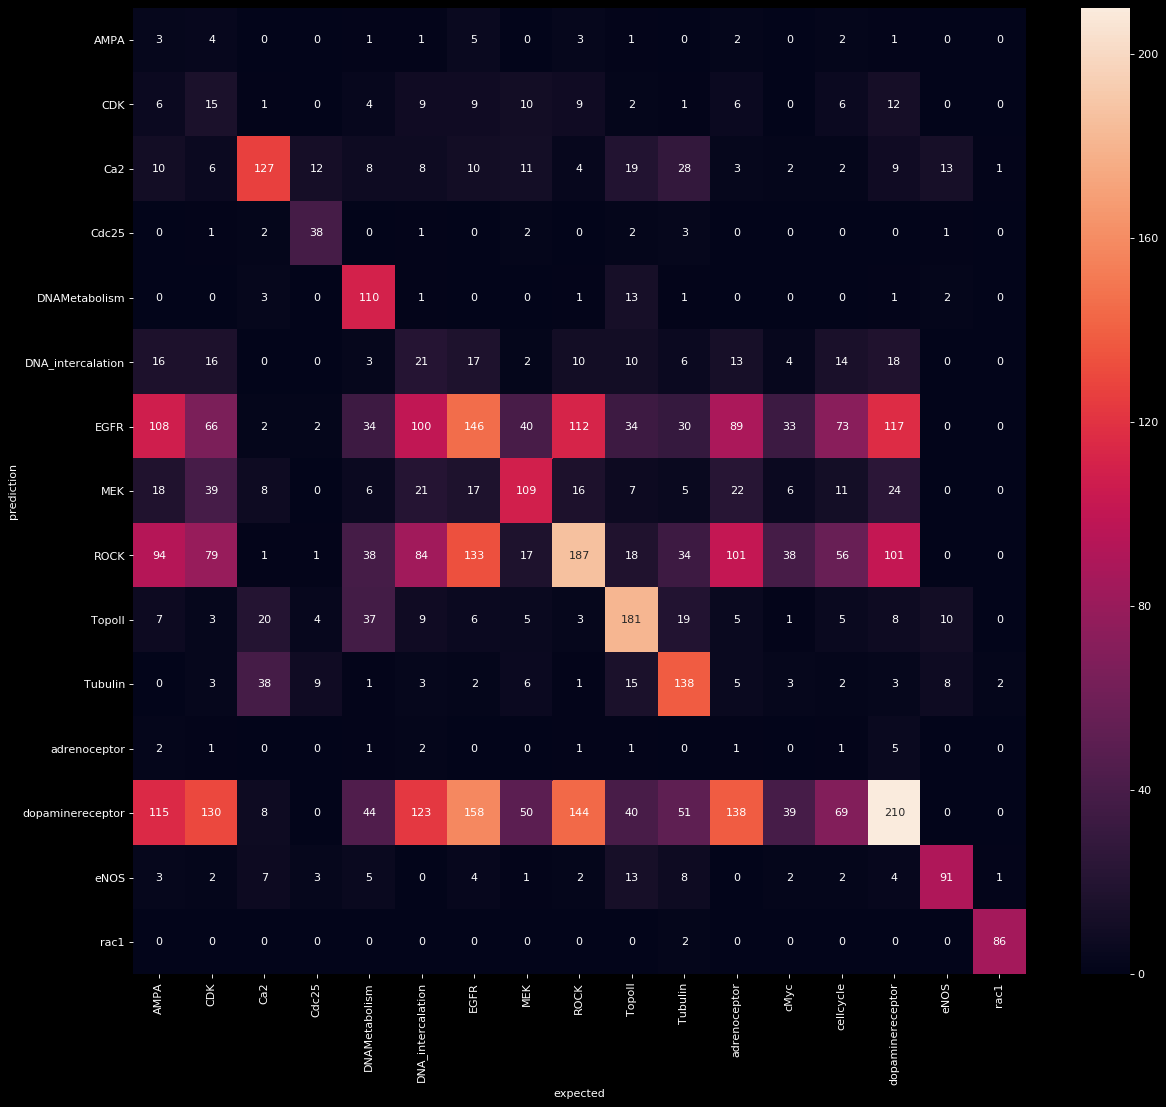

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18, 16), dpi= 80, edgecolor='k')

sns.heatmap(conflusion_matrix, annot=True, fmt="g")
plt.show()

# F1 score

In [70]:
from sklearn.metrics import f1_score
print(f1_score(results.expected, results.prediction, average='macro'))

0.32713687629412774
/home/tom/miniconda3/envs/cytodata-single-cell/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
